# Interactive Spectroscopy App Demo

This notebook demonstrates the new interactive spectroscopy application that connects the data processing class to a plotly+ipywidgets layout.

In [1]:
import numpy as np
from pyquac_light import Spectroscopy, RandomSpectroscopy, launch_app, InteractiveSpectroscopyApp


## 2. Create Sample Data and Launch App

Now let's create some sample spectroscopy data and launch the app with it.

In [2]:
# Create sample data
x_arr = np.linspace(-1.0, 1.0, 51)  # Smaller grid for demo
y_arr = np.linspace(4e9, 5e9, 101)

# Create a RandomSpectroscopy instance
spec = RandomSpectroscopy(x_arr=x_arr, y_arr=y_arr)

# Run a quick scan to get some initial data
# spec.run_full_scan(sleep=1e-6)

print(f"Created spectroscopy data with {len(spec.x_arr)} x points and {len(spec.y_arr)} y points")
print(f"Total measured points: {len(spec._raw_x)}")

Created spectroscopy data with 51 x points and 101 y points
Total measured points: 0


In [3]:
spec = RandomSpectroscopy.load_csv("example_data.csv")

## 3. Launch Interactive App with Data

Launch the app with the spectroscopy data. This demonstrates:
- Live data connection: the heatmap shows current data from the spec instance
- Click interactions: clicking on the heatmap updates the horizontal and vertical slices
- Performance controls: switch between Static/Live modes
- Crosshair controls: toggle crosshair visibility

In [4]:
app = InteractiveSpectroscopyApp(spec)
app.get_widget()

In [5]:
spec.clear()

In [4]:
spec.run_full_scan(sleep=0.05)

In [7]:
spec.run_corridor_scan(app.fitted_ridge, sleep=0.005)

In [5]:
spec.drop(x=0.2)

In [5]:
spec.clean_up(app.fitted_ridge)

TypeError: 'NoneType' object is not callable

## 4. Test Live Updates

Now let's test the live update functionality. When you run the cell below, new data points will be added to the spectroscopy instance, and if the app is in "Live" mode, you should see the heatmap update automatically.

In [ ]:
# Add more data points - this should trigger live updates in the app
import time

print("Adding new data points...")
for i in range(10):
    # Add some random points
    x_val = np.random.choice(spec.x_arr)
    y_val = np.random.choice(spec.y_arr)
    z_val = np.random.random()
    
    spec.write(x_val, y_val, z_val)
    print(f"Added point ({x_val:.3f}, {y_val:.2e}, {z_val:.3f})")
    
    time.sleep(0.5)  # Wait to see the updates

print("Done adding points!")

## 5. Test Data Operations

Test how the app reacts to data operations like dropping points.

In [ ]:
# Drop some x values - this should update the heatmap
x_to_drop = spec.x_arr[::10]  # Drop every 10th x value
print(f"Dropping data at x values: {x_to_drop}")

spec.drop(x=x_to_drop)
print("Data dropped! Check the heatmap for updates.")

## 6. Test Ridge Fitting

Add some structured data and test the ridge fitting functionality.

In [ ]:
# Clear existing data and add structured data for ridge fitting
spec.clear()

# Create a synthetic ridge pattern
for i, x_val in enumerate(spec.x_arr[::2]):  # Use every other x point
    # Create a parabolic ridge
    y_center = 4.5e9 + 0.1e9 * x_val**2  # Parabolic center
    
    # Add points around the ridge
    for j in range(5):
        y_offset = (j - 2) * 0.02e9  # Small spread around center
        y_val = y_center + y_offset
        
        # Make sure y_val is within bounds
        if spec.y_arr[0] <= y_val <= spec.y_arr[-1]:
            # Higher signal near the ridge center
            z_val = 1.0 - abs(y_offset) / 0.02e9 + 0.1 * np.random.random()
            spec.write(x_val, y_val, z_val)

print(f"Added structured data with {len(spec._raw_x)} points")
print("Now try the 'Fit Ridge' button in the app!")

## Instructions for Testing

1. **Click Interactions**: Click anywhere on the main heatmap to see the horizontal and vertical slices update

2. **Crosshairs**: Toggle the "Show click lines" checkbox to show/hide crosshair lines at your click position

3. **Performance Mode**: 
   - Switch to "Live" mode to see automatic updates when data changes
   - Switch to "Static" mode to disable automatic updates
   - Adjust the update interval (in milliseconds)

4. **Ridge Fitting**: 
   - Set the polynomial degree (try 2 for the parabolic data)
   - Click "Fit Ridge" to fit a curve to the peak positions
   - Toggle "Show Fit Curve" to show/hide the fitted curve

5. **File Operations**: 
   - "Save CSV" will save the current data to a file
   - "Load CSV" is a placeholder for now

The app successfully connects the Spectroscopy data processing class to the interactive plotly+ipywidgets interface!

In [5]:
import plotly.graph_objects as go
import numpy as np
from scipy.special import gamma
from pathlib import Path

xdata = np.linspace(-5, 5, 1000)
ydata = gamma(xdata)

trace0 = go.Scatter(
    x=xdata,
    y=ydata,
    name='Γ(x)', mode='lines',
    line=dict(color='black', width=.8))

fig = go.Figure((trace0,))

# Styling
style_dict = {
    'layout.plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'layout.font.family': 'Times New Roman',
    'layout.xaxis.linecolor': 'black',
    'layout.xaxis.ticks': 'inside',
    'layout.xaxis.mirror': True,
    'layout.xaxis.showline': True,
    'layout.yaxis.linecolor': 'black',
    'layout.yaxis.ticks': 'inside',
    'layout.yaxis.mirror': True,
    'layout.yaxis.showline': True,
    'layout.autosize': False,
    'layout.showlegend': True,
    'layout.legend.bgcolor': 'rgba(0, 0, 0, 0)',
    'layout.legend.xanchor': 'right',
    'layout.legend.x': 1,
    'layout.legend.font.family': 'monospace',
    # Specialized:
    # 'layout.xaxis.range': (2.3, 2.5),
    'layout.yaxis.range': (-50, +50),
    'layout.xaxis.title': r'$x$',
    'layout.yaxis.title': r'$y$',
    'layout.title': 'Advanced Example of a Line Plot with Plotly',
}
fig.update(**style_dict)
fig.add_annotation(dict(
    xref='paper',
    yref='paper',
    x=0.5, y=-0.25,
    showarrow=False,
    text='The figure above, is an example of publication quality plotting for'
    ' scientific journals. This plot was generated using Plotly.'))

fig

ModuleNotFoundError: No module named 'scipy'

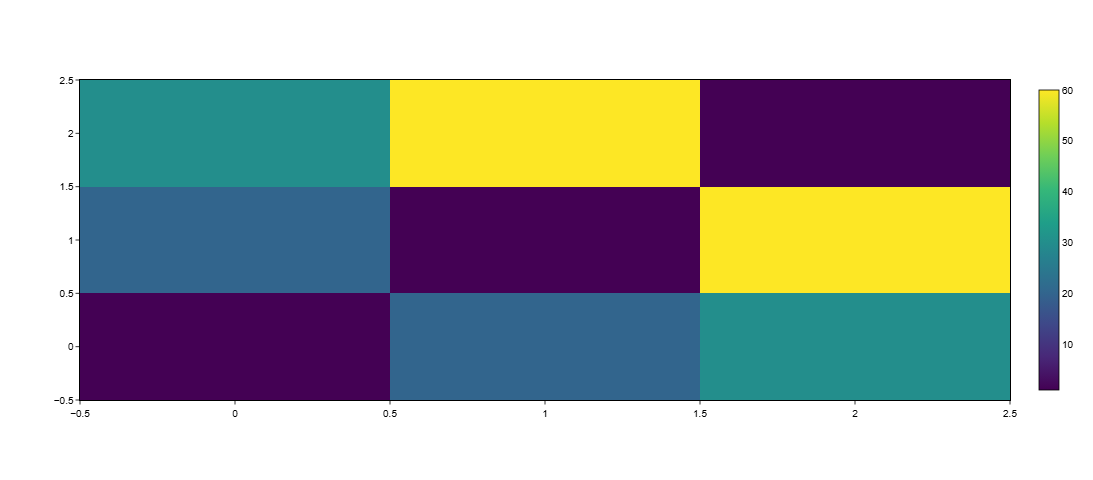

In [5]:
import plotly.graph_objects as go

# Example 3×3 data
z = [
    [1, 20, 30],
    [20, 1, 60],
    [30, 60, 1]
]

fig = go.Figure(data=go.Heatmap(
    z=z,
    colorscale='Viridis',  # matches Matplotlib's default 'viridis' colormap
    showscale=True,
    colorbar=dict(
        thickness=20,               # bar thickness in pixels
        outlinewidth=0.8,           # border width (pts)
        outlinecolor='black',       # border color
        ticklen=3.5,                # tick length (pts)
        tickwidth=0.8,              # tick width (pts)
        tickcolor='black',          # tick color
        tickfont=dict(
            size=10,                # tick label font size
            family='sans-serif',    # tick label font family
            color='black'
        )
    )
))

fig.update_layout(
    width=640,                      # 6.4 in × 100 dpi :contentReference[oaicite:10]{index=10}
    height=480,                     # 4.8 in × 100 dpi :contentReference[oaicite:11]{index=11}
    font=dict(
        family='sans-serif',        # default font family :contentReference[oaicite:12]{index=12}
        size=10,                    # default font size :contentReference[oaicite:13]{index=13}
        color='black'
    ),
    paper_bgcolor='white',          # matches figure.facecolor :contentReference[oaicite:14]{index=14}
    plot_bgcolor='white',           # matches axes.facecolor :contentReference[oaicite:15]{index=15}
    margin=dict(l=80, r=80, t=80, b=80),
    xaxis=dict(
        showline=True,
        linecolor='black',          # spine color :contentReference[oaicite:16]{index=16}
        mirror=True,                # show all four spines
        ticks='outside',
        ticklen=3.5,                # tick length :contentReference[oaicite:17]{index=17}
        tickwidth=0.8,              # tick width :contentReference[oaicite:18]{index=18}
        tickcolor='black'
    ),
    yaxis=dict(
        showline=True,
        linecolor='black',          # spine color :contentReference[oaicite:19]{index=19}
        mirror=True,
        ticks='outside',
        ticklen=3.5,                # tick length :contentReference[oaicite:20]{index=20}
        tickwidth=0.8,              # tick width :contentReference[oaicite:21]{index=21}
        tickcolor='black'
    ),
)

fig.show()
